In [11]:
import os
import kaggle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error as MSE

In [5]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
# Setting the environment variable to the location of the kaggle.json file
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/Renz/.kaggle"

# Verifying if the Kaggle API is configured properly
try:
    kaggle.api.authenticate()
    print('Kaggle API authentication successful.')
except Exception as e:
    print(f"Error: {e}")

Kaggle API authentication successful.


In [4]:
# Dataset link: https://www.kaggle.com/datasets/henslersoftware/19560-indian-takeaway-orders
dataset = 'henslersoftware/19560-indian-takeaway-orders'
download_path = './data'

if not os.path.exists(download_path):
    os.makedirs(download_path)

kaggle.api.dataset_download_files(dataset, path=download_path, unzip=True)

print('Dataset downloaded and unzipped successfully.')

Dataset URL: https://www.kaggle.com/datasets/henslersoftware/19560-indian-takeaway-orders
Dataset downloaded and unzipped successfully.


In [15]:
orders = pd.read_csv('./data/restaurant-1-orders.csv')
orders.columns = ['order_number', 'timestamp', 'item_name', 'quantity', 'price', 'total_products_in_cart']
orders.sample(3)

In [27]:
orders['date'] = pd.to_datetime(orders['timestamp'].str[:10], format='%d/%m/%Y')
orders.sample(3)

,order_number,timestamp,item_name,quantity,price,total_products_in_cart,date
25190,6535,28/08/2017 18:44,Keema Naan,1,2.95,6,2017-08-28
38106,3611,05/11/2016 18:02,Onion Bhajee,1,3.95,8,2016-11-05
3686,7862,20/12/2017 18:32,Mango Chutney,1,0.50,9,2017-12-20


In [25]:
print(f'Total number of orders: {orders['order_number'].nunique()}')

Total number of orders: 13397


In [26]:
def load_query(path):
    with open(path) as file:
        return file.read()

#### Case 1: Direct Multistep Forecasting

In [32]:
query1 = load_query('./queries/daily_orders.sql')
daily_orders = pysqldf(query1)
daily_orders.sample(3)

,date,num_orders
615,2017-12-11,6
1084,2019-04-03,7
358,2017-03-28,7


ValueError: Could not interpret value `daily_orders` for `y`. An entry with this name does not appear in `data`.

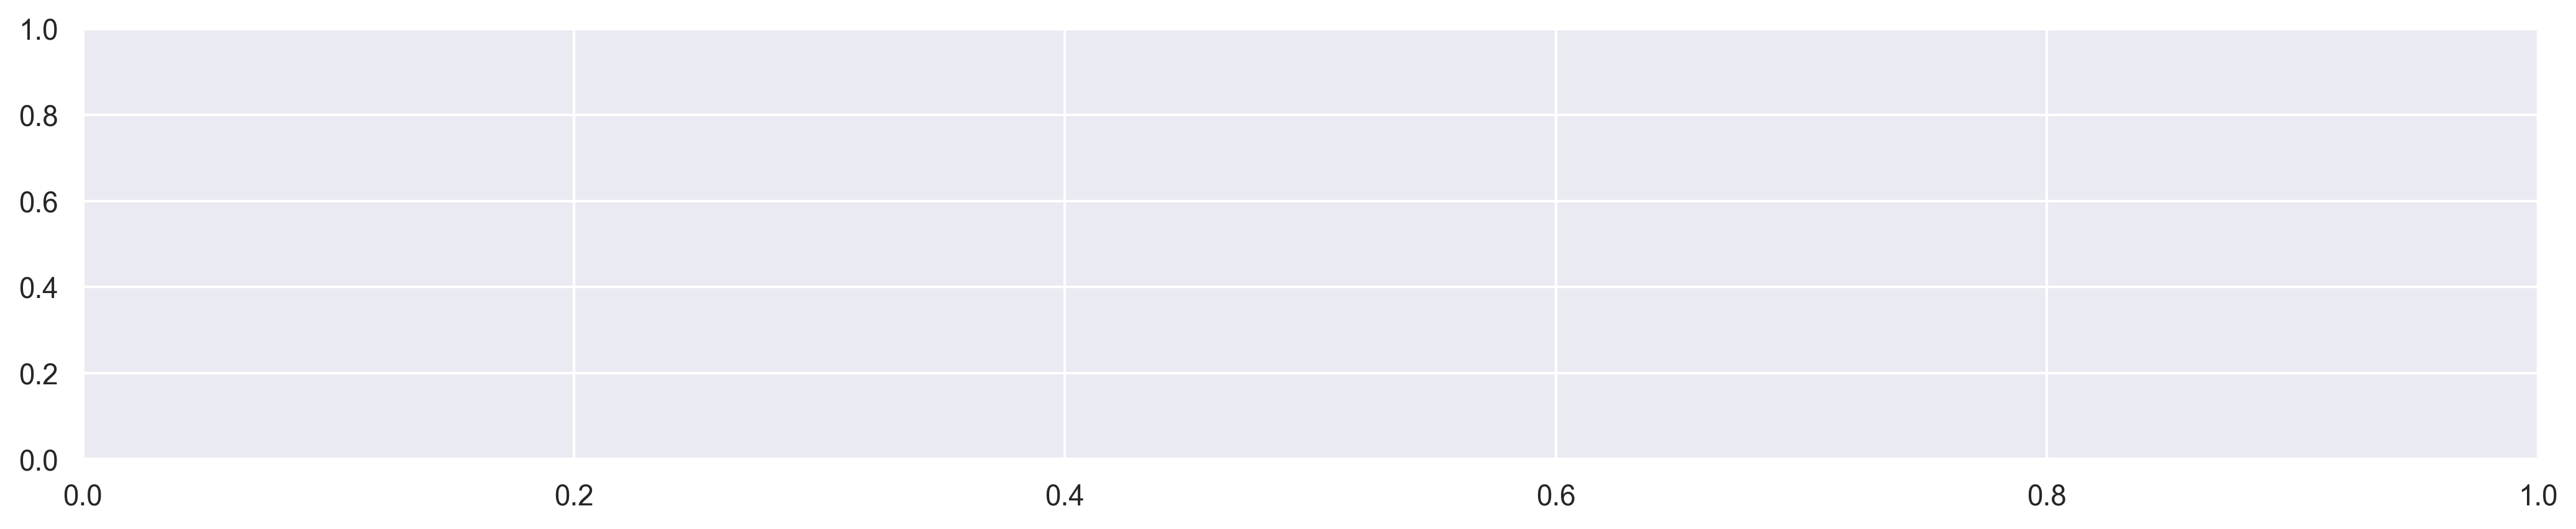

In [34]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_orders.tail(50), x='date', y='daily_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

There number of orders daily is too low which does not necessitate forecasting.
A look at the weekly order volume might be interesting to check.

In [ ]:
query2 = load_query()